Null Values in the Dataframe

patchID       0
team1_Name    0
team2_Name    0
mapName       0
team1Score    0
team2Score    0
agent1        2
agent2        2
agent3        2
agent4        2
agent5        2
agent6        2
agent7        2
agent8        2
agent9        2
agent10       2
dtype: int64

Null Values Dropped

patchID       0
team1_Name    0
team2_Name    0
mapName       0
team1Score    0
team2Score    0
agent1        0
agent2        0
agent3        0
agent4        0
agent5        0
agent6        0
agent7        0
agent8        0
agent9        0
agent10       0
dtype: int64


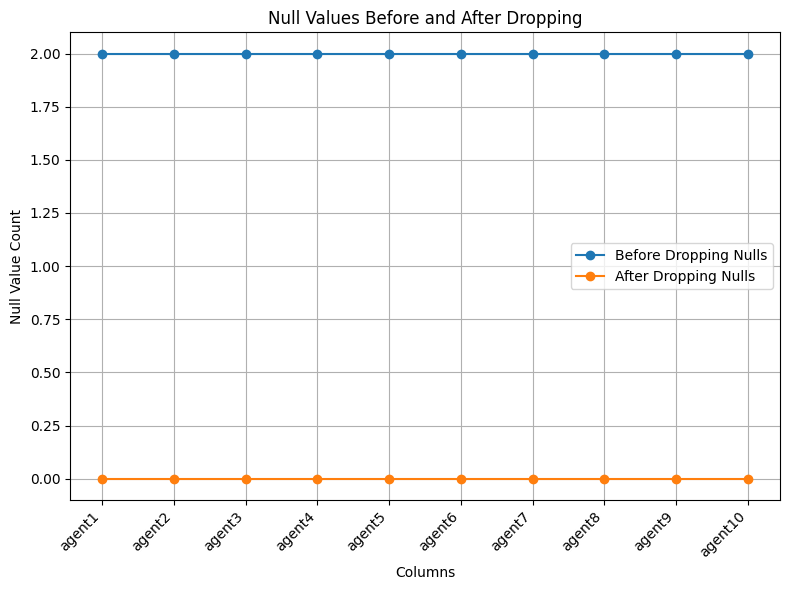


Duplicate Values in the Dataframe: 0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("C:/Semester Work/DAV Project/datasets/vlrDataset.csv")

# Null values in the dataframe
print("Null Values in the Dataframe\n")
print(df.isnull().sum())

# Plot null values before dropping
before_dropping_nulls = df.isnull().sum()
columns_with_nulls = before_dropping_nulls[before_dropping_nulls > 0].index
before_dropping_nulls = before_dropping_nulls[columns_with_nulls]

# Drop null values
df = df.dropna()

# Null values after dropping
print("\nNull Values Dropped\n")
print(df.isnull().sum())

# Plot null values after dropping
after_dropping_nulls = before_dropping_nulls.copy()
after_dropping_nulls[:] = 0

# Create a DataFrame for plotting
null_values_df = pd.DataFrame({
    'Before Dropping': before_dropping_nulls,
    'After Dropping': after_dropping_nulls
})

# Plot the line chart
plt.figure(figsize=(8, 6))
plt.plot(null_values_df.index, null_values_df['Before Dropping'], marker='o', label='Before Dropping Nulls')
plt.plot(null_values_df.index, null_values_df['After Dropping'], marker='o', label='After Dropping Nulls')

plt.title('Null Values Before and After Dropping')
plt.xlabel('Columns')
plt.ylabel('Null Value Count')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Duplicate values in the dataframe
print(f"\nDuplicate Values in the Dataframe: {df.duplicated().sum()}")

# Team encoding
listOfTeams = [[], []]
listOfTeams[0] = list(df["team1_Name"])
listOfTeams[1] = list(df["team2_Name"])

setOfTeams = [[set(listOfTeams[0])], [set(listOfTeams[1])]]

finalSet = []

for i in range(len(listOfTeams[0])):
    finalSet.append(listOfTeams[0][i])

for i in range(len(listOfTeams[1])):
    finalSet.append(listOfTeams[1][i])

finalSet = set(finalSet)

teamEncoding = {team: idx for idx, team in enumerate(finalSet)}

df["team1Encoded"] = df["team1_Name"].map(teamEncoding)
df["team2Encoded"] = df["team2_Name"].map(teamEncoding)

# Agent encoding
listOfAgents = (
    list(df["agent1"])
    + list(df["agent2"])
    + list(df["agent3"])
    + list(df["agent4"])
    + list(df["agent5"])
    + list(df["agent6"])
    + list(df["agent7"])
    + list(df["agent8"])
    + list(df["agent9"])
    + list(df["agent10"])
)

setOfAgents = set(listOfAgents)

agentEncoding = {agent: idx for idx, agent in enumerate(setOfAgents)}

df["agent1Encoded"] = df["agent1"].map(agentEncoding)
df["agent2Encoded"] = df["agent2"].map(agentEncoding)
df["agent3Encoded"] = df["agent3"].map(agentEncoding)
df["agent4Encoded"] = df["agent4"].map(agentEncoding)
df["agent5Encoded"] = df["agent5"].map(agentEncoding)
df["agent6Encoded"] = df["agent6"].map(agentEncoding)
df["agent7Encoded"] = df["agent7"].map(agentEncoding)
df["agent8Encoded"] = df["agent8"].map(agentEncoding)
df["agent9Encoded"] = df["agent9"].map(agentEncoding)
df["agent10Encoded"] = df["agent10"].map(agentEncoding)

# Map encoding
listOfMaps = list(df["mapName"])
setOfMaps = set(listOfMaps)

mapEncoding = {map: idx for idx, map in enumerate(setOfMaps)}

df["encodedMapName"] = df["mapName"].map(mapEncoding)

# Add year column
df["year"] = None

df.loc[(df["patchID"] >= 2.04) & (df["patchID"] <= 3.10), "year"] = 2021
df.loc[(df["patchID"] >= 4.02) & (df["patchID"] <= 5.04), "year"] = 2022
df.loc[(df["patchID"] >= 6.02) & (df["patchID"] <= 7.02), "year"] = 2023
df.loc[(df["patchID"] >= 8.02) & (df["patchID"] <= 9.02), "year"] = 2024

# Create team agent columns
df["team1Agents"] = (
    df[["agent1Encoded", "agent2Encoded", "agent3Encoded", "agent4Encoded", "agent5Encoded"]]
    .astype(str)
    .apply(lambda x: ", ".join(x), axis=1)
)

df["team2Agents"] = (
    df[["agent6Encoded", "agent7Encoded", "agent8Encoded", "agent9Encoded", "agent10Encoded"]]
    .astype(str)
    .apply(lambda x: ", ".join(x), axis=1)
)

# Processed DataFrame
processedDF = df[
    [
        "year",
        "team1Encoded",
        "team2Encoded",
        "encodedMapName",
        "team1Score",
        "team2Score",
        "agent1Encoded",
        "agent2Encoded",
        "agent3Encoded",
        "agent4Encoded",
        "agent5Encoded",
        "agent6Encoded",
        "agent7Encoded",
        "agent8Encoded",
        "agent9Encoded",
        "agent10Encoded",
        "team1Agents",
        "team2Agents",
    ]
]

# Save processed DataFrame to CSV
processedDF.to_csv("C:/Semester Work/DAV Project/datasets/processedVLRDataset.csv", index=False)


In [4]:
df.head()

,patchID,team1_Name,team2_Name,mapName,team1Score,team2Score,agent1,agent2,agent3,agent4,...,agent5Encoded,agent6Encoded,agent7Encoded,agent8Encoded,agent9Encoded,agent10Encoded,encodedMapName,year,team1Agents,team2Agents
0,2.04,Envy,Gen.G,Haven,13,6,Phoenix,Sova,Raze,Cypher,...,1,1,21,7,4,20,10,2021,"4, 21, 22, 20, 1","1, 21, 7, 4, 20"
1,2.04,Envy,Gen.G,Icebox,5,13,Sova,Killjoy,Phoenix,Raze,...,1,7,6,1,5,21,5,2021,"21, 6, 4, 22, 1","7, 6, 1, 5, 21"
2,2.04,Envy,Gen.G,Bind,13,10,Phoenix,Omen,Sova,Raze,...,20,1,20,21,22,5,4,2021,"4, 1, 21, 22, 20","1, 20, 21, 22, 5"
3,2.04,XSET,FaZe Clan,Haven,6,13,Sova,Jett,Raze,Omen,...,20,7,21,22,1,17,10,2021,"21, 7, 22, 1, 20","7, 21, 22, 1, 17"
4,2.04,XSET,FaZe Clan,Bind,3,13,Sova,Raze,Jett,Omen,...,20,22,21,17,7,1,4,2021,"21, 22, 7, 1, 20","22, 21, 17, 7, 1"


In [5]:
processedDF.head()

,year,team1Encoded,team2Encoded,encodedMapName,team1Score,team2Score,agent1Encoded,agent2Encoded,agent3Encoded,agent4Encoded,agent5Encoded,agent6Encoded,agent7Encoded,agent8Encoded,agent9Encoded,agent10Encoded,team1Agents,team2Agents
0,2021,20,76,10,13,6,4,21,22,20,1,1,21,7,4,20,"4, 21, 22, 20, 1","1, 21, 7, 4, 20"
1,2021,20,76,5,5,13,21,6,4,22,1,7,6,1,5,21,"21, 6, 4, 22, 1","7, 6, 1, 5, 21"
2,2021,20,76,4,13,10,4,1,21,22,20,1,20,21,22,5,"4, 1, 21, 22, 20","1, 20, 21, 22, 5"
3,2021,74,68,10,6,13,21,7,22,1,20,7,21,22,1,17,"21, 7, 22, 1, 20","7, 21, 22, 1, 17"
4,2021,74,68,4,3,13,21,22,7,1,20,22,21,17,7,1,"21, 22, 7, 1, 20","22, 21, 17, 7, 1"
